In [2]:

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import seaborn as sns

In [3]:
# pip freeze > requirements.txt

In [4]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [5]:

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [9]:
# cap = cv2.VideoCapture(0)

# holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) 
# while True:
#     success,img=cap.read()
#     # Make detections
#     img = cv2.resize(img, (1280,  720))
#     img=cv2.flip(img,1);
#     img, results = mediapipe_detection(img, holistic)
    
    
#     # Draw landmarks
#     draw_styled_landmarks(img, results)

#     cv2.imshow("image",img)
#     key = cv2.waitKey(1) & 0xFF

#     if key == ord("q"):
#         break
   
# cv2.destroyAllWindows()

In [11]:
# results.left_hand_landmarks

In [10]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
def extract_keypoints(results):
#     pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#     face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [13]:
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
# np.concatenate([ lh, rh])


In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect


actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [15]:
# for action in actions: 
# #     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

In [16]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) 
    
# # NEW LOOP
# # Loop through actions
# for action in actions:
#     # Loop through sequences aka videos
#     for sequence in range(0,no_sequences):
#         # Loop through video length aka sequence length
#         for frame_num in range(sequence_length):

#             # Read feed
#             ret, frame = cap.read()
#             frame = cv2.resize(frame, (1280,  720))
#             frame=cv2.flip(frame,1);
#             # Make detections
#             image, results = mediapipe_detection(frame, holistic)
# #                 print(results)

#             # Draw landmarks
#             draw_styled_landmarks(image, results)

#             # NEW Apply wait logic
#             if frame_num == 0: 
#                 cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                 cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                 # Show to screen
#                 cv2.imshow('OpenCV Feed', image)
#                 cv2.waitKey(2000)
#             else: 
#                 cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                 # Show to screen
#                 cv2.imshow('OpenCV Feed', image)

#             # NEW Export keypoints
#             keypoints = extract_keypoints(results)
#             npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#             np.save(npy_path, keypoints)

#             # Break gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break

# cap.release()
# cv2.destroyAllWindows()

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

label_map = {label:num for num, label in enumerate(actions)}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
# sequences

In [18]:
X = np.array(sequences)

y = to_categorical(labels).astype(int)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [30]:
# model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

In [31]:
# # model.summary()
# ?model.fit()

In [18]:
# N = 1000
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# plt.savefig('a.png')

In [32]:
# res = model.predict(X_test)

In [33]:
# for i in range(len(res)):
#     print(actions[np.argmax(res[i])],end=" ")

In [34]:
# for i in range(len(res)):
#     print(actions[np.argmax(y_test[i])],end=" ")

In [35]:
#  model.save('model_30_A-Z_1000.h5')

In [36]:
# del model

In [24]:
 model.load_weights('model_30_A-Z_1000.h5')

In [25]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
# yhat = model.predict(X_test)

# ytrue = np.argmax(y_test, axis=1).tolist()

# yhat = np.argmax(yhat, axis=1).tolist()

# multilabel_confusion_matrix(ytrue, yhat)

array([[[62,  0],
        [ 0,  5]],

       [[64,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  2]],

       [[65,  0],
        [ 0,  2]],

       [[64,  0],
        [ 0,  3]],

       [[66,  0],
        [ 0,  1]],

       [[62,  0],
        [ 0,  5]],

       [[64,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  2]],

       [[63,  0],
        [ 0,  4]],

       [[65,  0],
        [ 0,  2]],

       [[66,  0],
        [ 0,  1]],

       [[64,  0],
        [ 0,  3]],

       [[64,  0],
        [ 0,  3]],

       [[64,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  2]],

       [[65,  0],
        [ 0,  2]],

       [[64,  0],
        [ 0,  3]],

       [[66,  0],
        [ 0,  1]],

       [[64,  0],
        [ 0,  3]],

       [[64,  0],
        [ 0,  3]],

       [[64,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  2]],

       [[66,  0],
        [ 0,  1]],

       [[64,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  2]]], dtype=int64)

In [33]:
# accuracy_score(ytrue,yhat)

In [85]:
def evaluatuion (model,X_test,y_test):
    s='act '
    s2='pred '
    #getting models predcitons on test set
    y_pred = []
    y_prob = model.predict(X_test)
    for i in y_prob:
        y_pred.append(np.argmax(i))
    y_test = np.asarray(y_test)
    rounded_labels=np.argmax(y_test, axis=1)
    confusion_matrix_array = confusion_matrix(rounded_labels,y_pred)
    print("simple confusion matrix")
    print(confusion_matrix_array)
    print("Report:")
#     print(classification_report(rounded_labels, y_pred,actions))
    
    
    print("Confusion Matrix:")
    confusion_matrix_array = confusion_matrix(rounded_labels,y_pred)
    fig, ax = plt.subplots(figsize=(18,18))  
    g= sns.heatmap(confusion_matrix_array, annot=True,yticklabels=[s+s1  for s1 in actions],xticklabels=[s2+s1  for s1 in actions],linewidths=.5, ax=ax)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    

    

    
    return y_pred
    

simple confusion matrix
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0

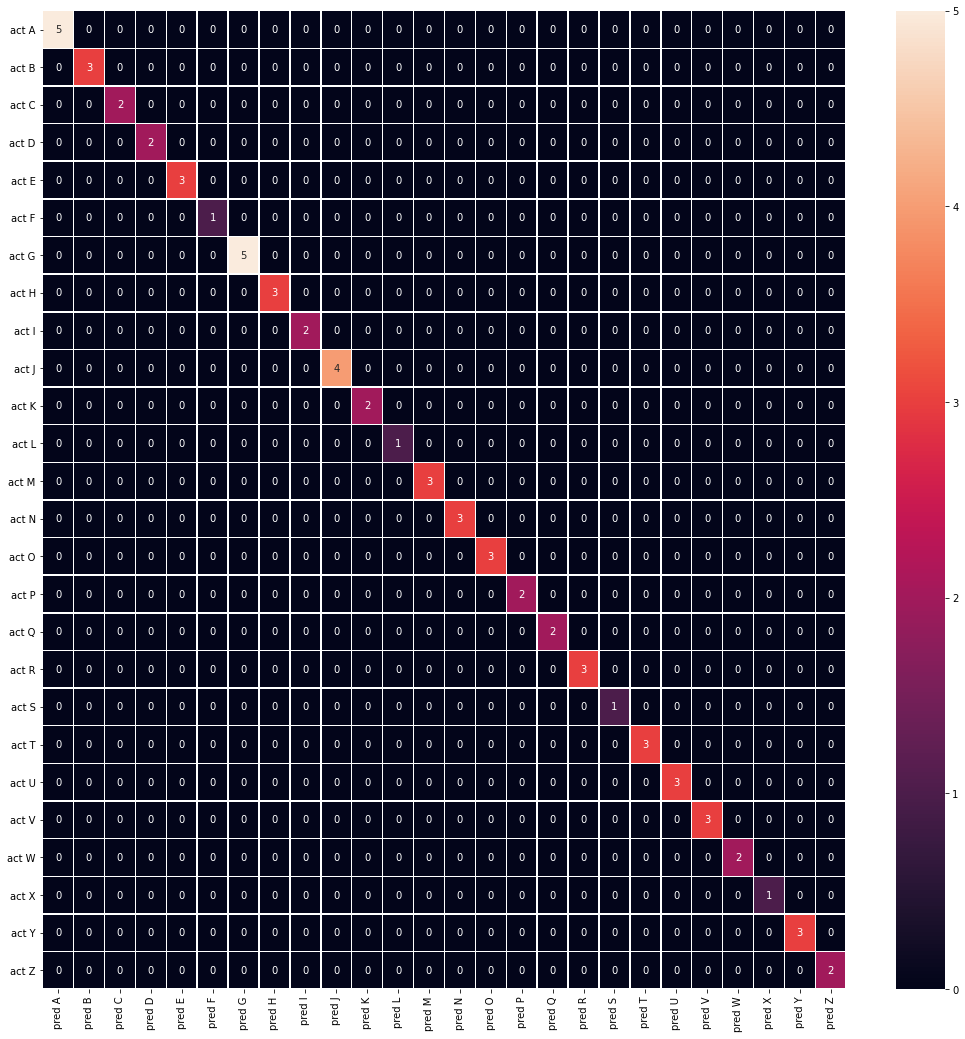

In [86]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.085)
y_pred = evaluatuion (model,X_test,y_test,)


In [37]:
sequence = []
sentence = []
counter=0;
ans='a'
# threshold = 0.5
a=True;

cap = cv2.VideoCapture(0)
holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) 
while True:
    success,img=cap.read()
    # Make detections
    img = cv2.resize(img, (1280,  720))
    img=cv2.flip(img,1);
    img, results = mediapipe_detection(img, holistic)
    
    
    
    # Draw landmarks
    draw_styled_landmarks(img, results)
    
    
        # 2. Prediction logic
    keypoints = extract_keypoints(results)
#     print(keypoints)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
    sequence.append(keypoints)
    sequence = sequence[-30:]
    counter+=1
    if len(sequence) == 30 and counter%15==0:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        ans=  actions[np.argmax(res)]
    cv2.putText(img, ans, (120,200),cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0, 0), 6, cv2.LINE_AA)
          
       

    cv2.imshow("image",img)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break
   
cv2.destroyAllWindows()